### Predict House Prices in King County 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# Load dataset
data = read_csv('kc_house_data.csv')
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

### Univariate Analysis

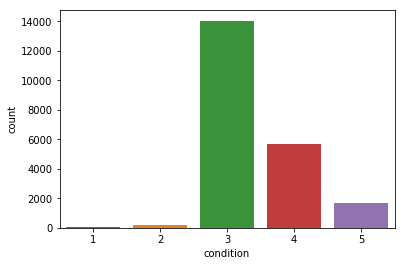

In [6]:
sn.countplot(data['condition']) # very few houses were in poor condition(1 and 2)...rest are average and above

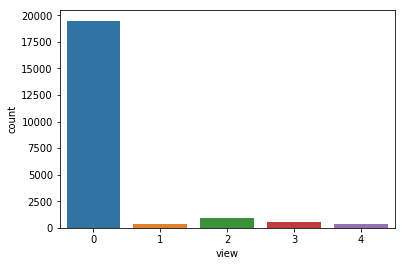

In [7]:
sn.countplot(data['view']) # Most of the houses has not been viewed. 

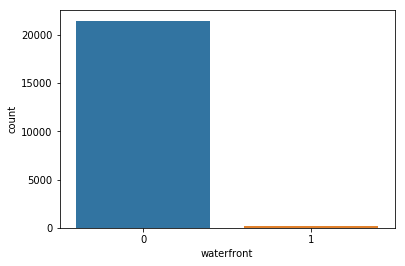

In [8]:
sn.countplot(data['waterfront']) # Most of them have no waterfront

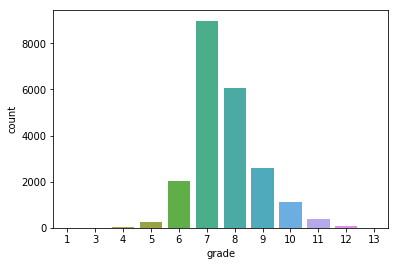

In [9]:
sn.countplot(data['grade']) # Mean shows most homes are grade 7 and above.

### Bi-variate Analysis

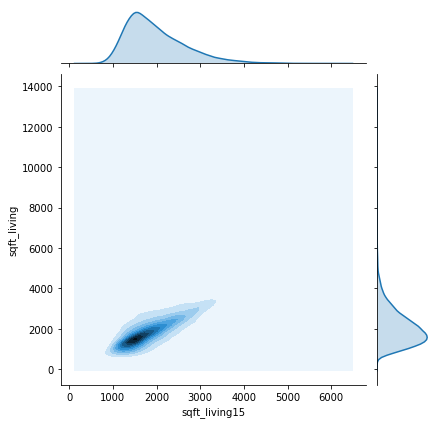

In [10]:
sn.jointplot(data['sqft_living15'], data['sqft_living'], kind='kde')# effect of living room sqft post renovation in 15

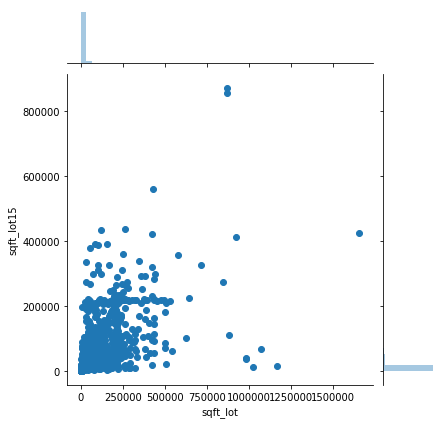

In [11]:
sn.jointplot(data['sqft_lot'], data['sqft_lot15'])# effect of lotarea size post renovation in 15

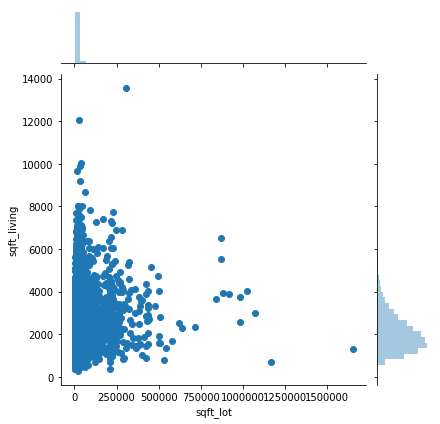

In [12]:
sn.jointplot(data['sqft_lot'], data['sqft_living']) #relationship between living area and lot area size

In [13]:
print(data['yr_renovated'].value_counts())

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


* Basic Analysis shows floors,waterfront, view,condition,grade, year_built,renovated,zipcode are discrete data/categorical data
* Renovated Year has 0s could be missing values(for 20699 records) or they did not undergo renovation and most of the homes that has values shows renovation in recent years.

In [14]:
# drop the id, date and year of renovation as they don't have much impact to our modelling
data.drop(['id','date', 'yr_renovated'],axis=1, inplace=True)

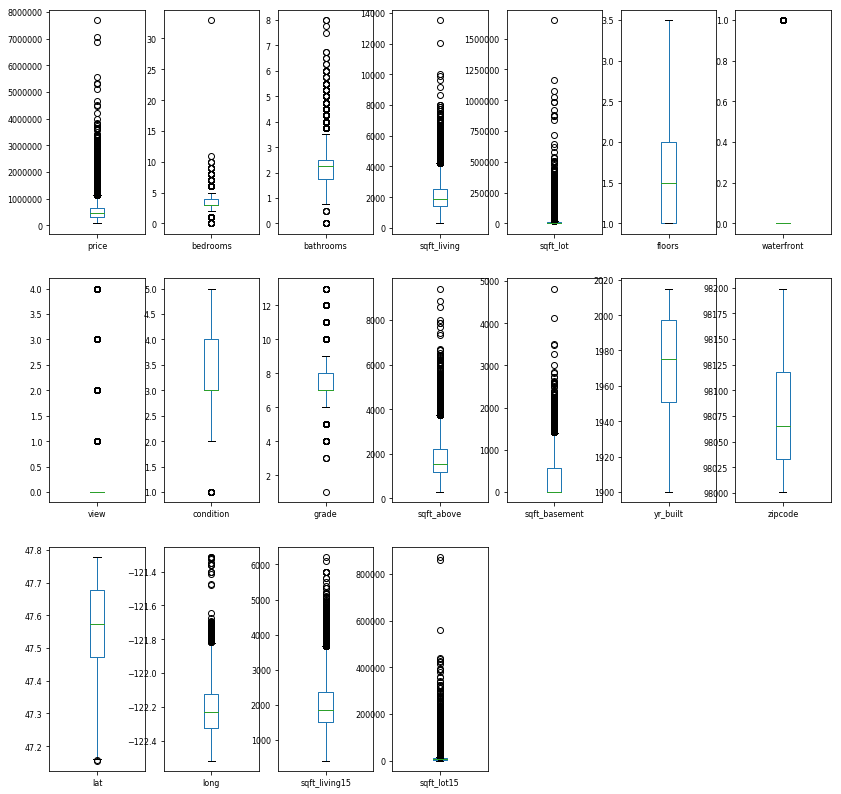

In [15]:
data.plot(kind='box', subplots=True, layout=(3,7), fontsize=8, figsize=(14,14))
pyplot.show()

### Outlier Removal - Box plot shows outliers 

In [16]:
data.shape

(21613, 18)

In [17]:
def outlier(col):
    if(col in ignorelist):
        return
    print(col)
    IQR_tax=data[col].quantile(0.75) - data[col].quantile(0.25)
    mincap = data[col].quantile(0.25) - 1.5*IQR_tax
    maxcap = data[col].quantile(0.75) + 1.5*IQR_tax
    outlier= data[(data[col] < mincap) | (data[col] > maxcap)]
    data.drop(outlier.index,inplace=True)

df_num = data.select_dtypes(include=[np.number])
ignorelist=['view','condition','grade','waterfront'] # ignore categorical data
for x in df_num.columns:
    outlier(x)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
sqft_above
sqft_basement
yr_built
zipcode
lat
long
sqft_living15
sqft_lot15


In [18]:
data.shape

(15909, 18)

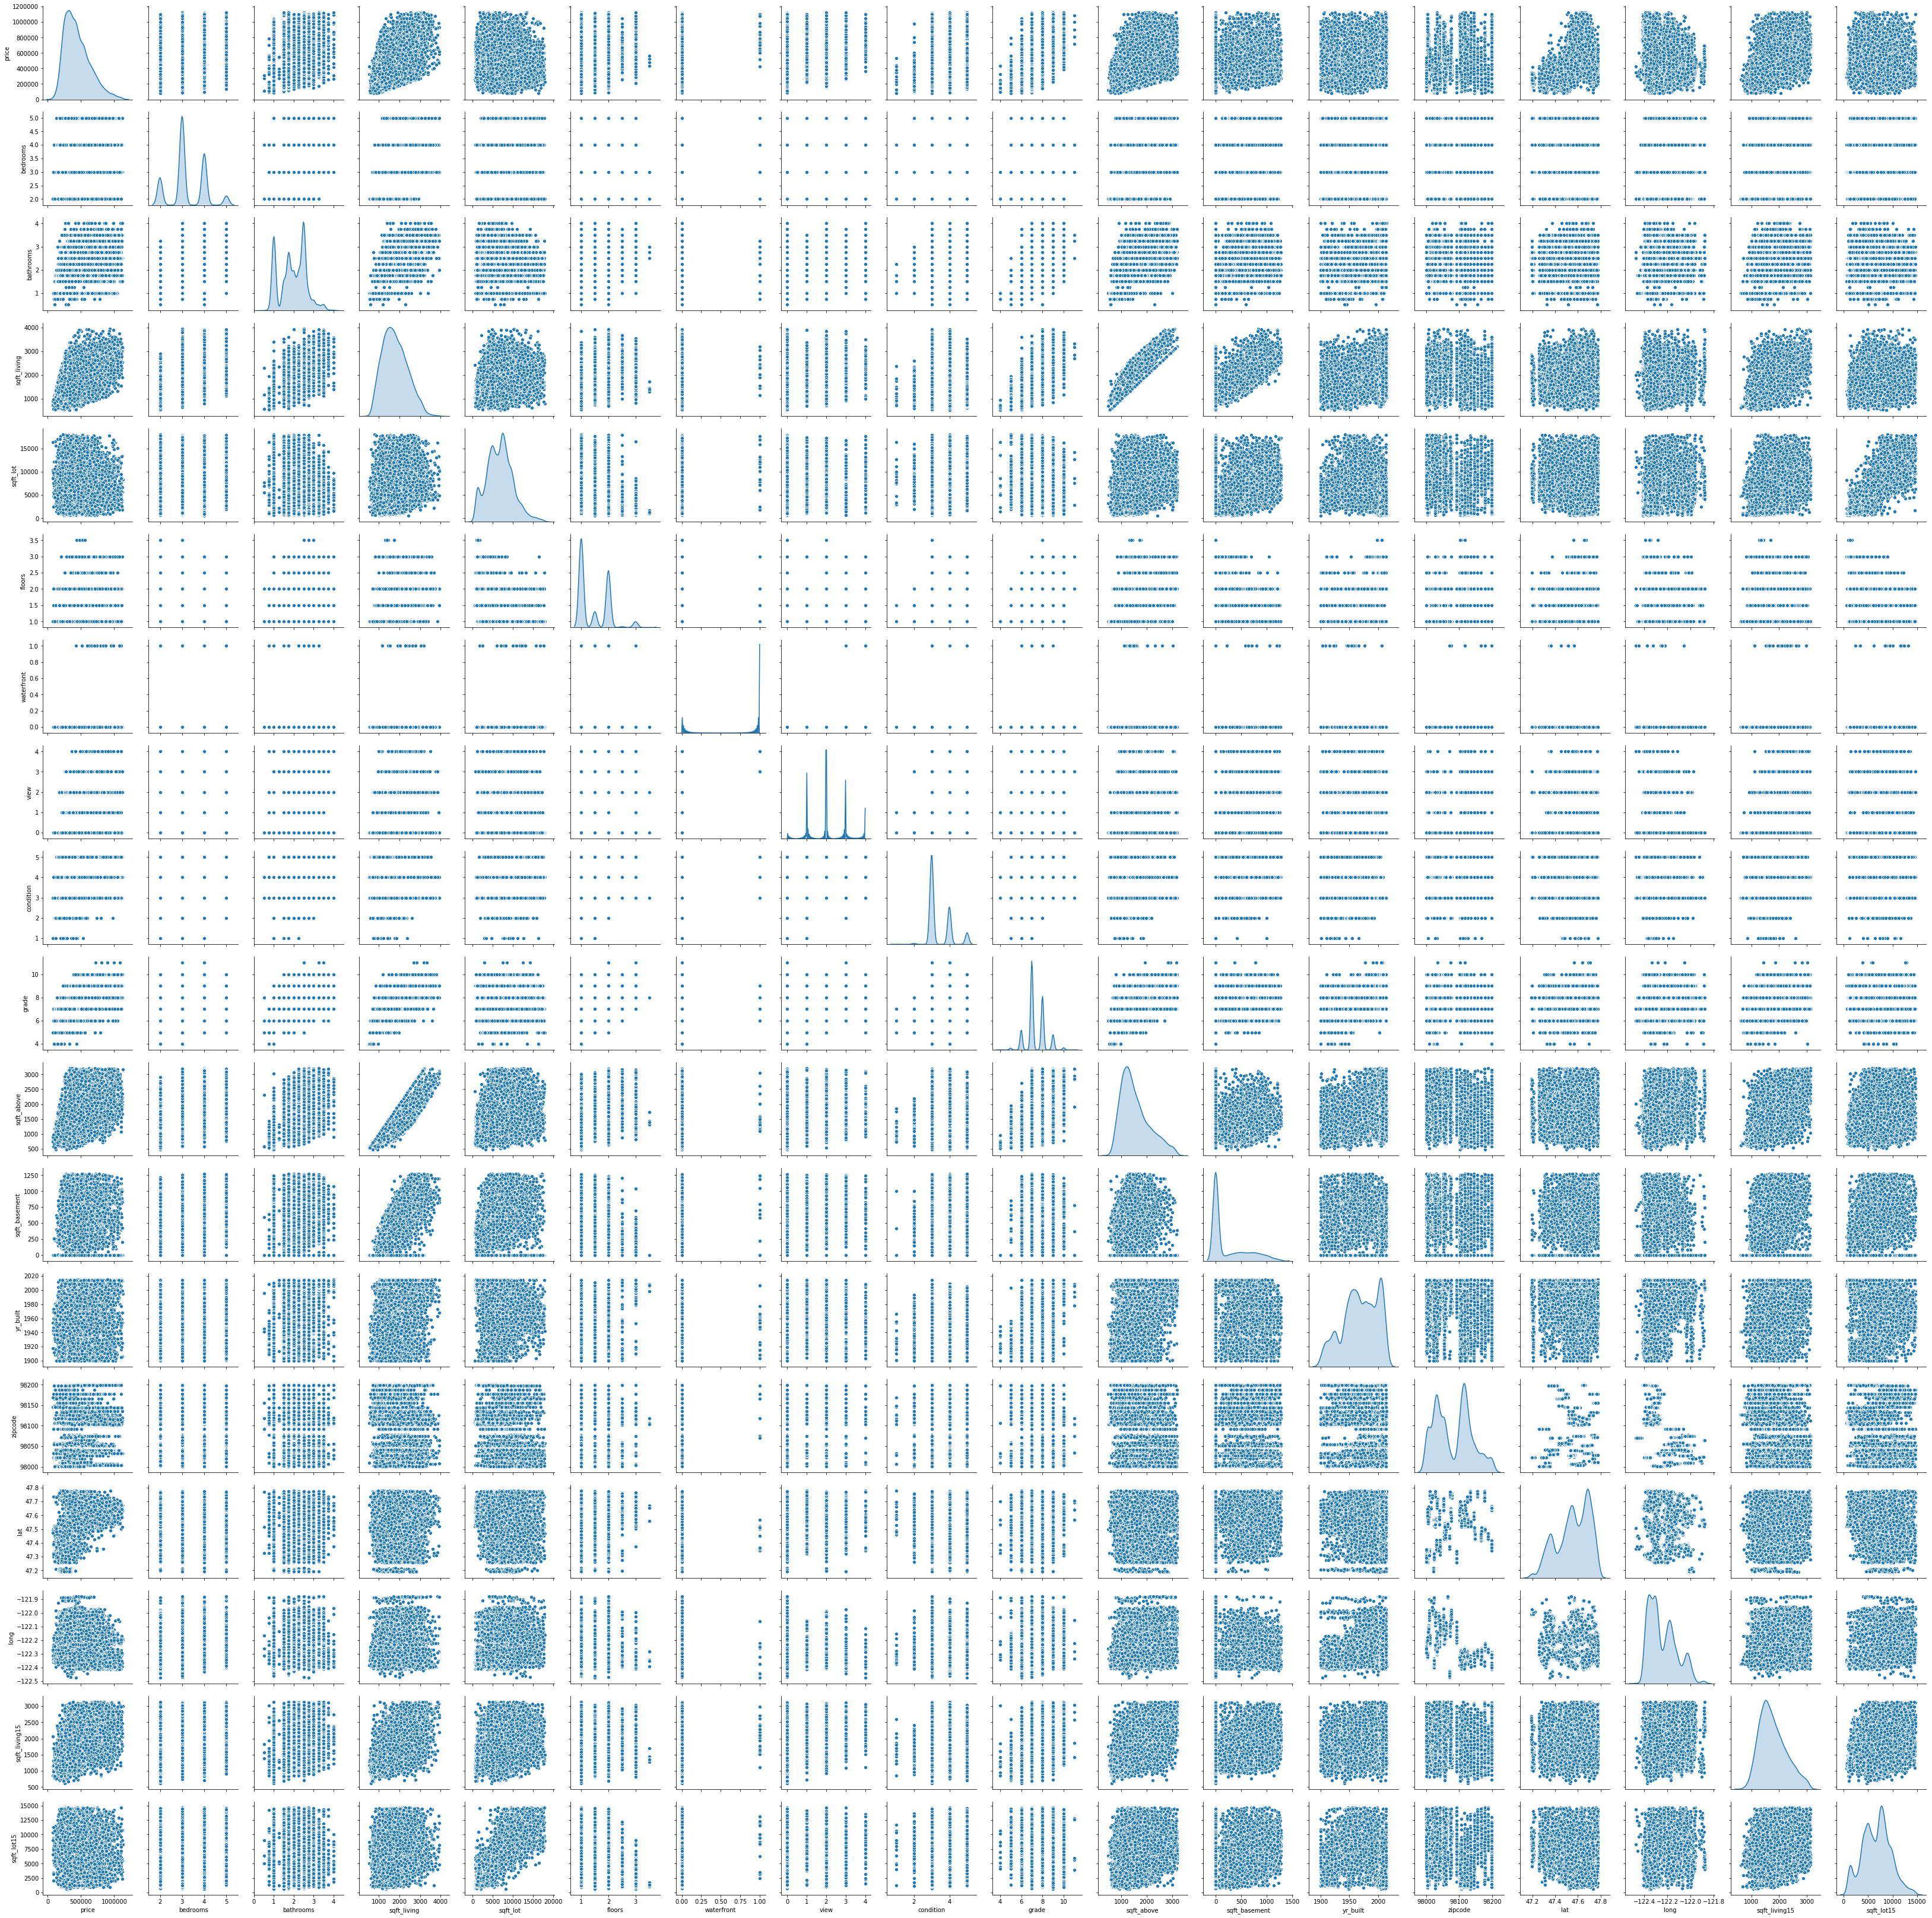

In [19]:
sn.pairplot(data,diag_kind='kde')

* Data along the diagonals shows data distribution has overlapping gaussians. Possibility of clustering.
* Sqft above and sqft living showing linear correlation. 

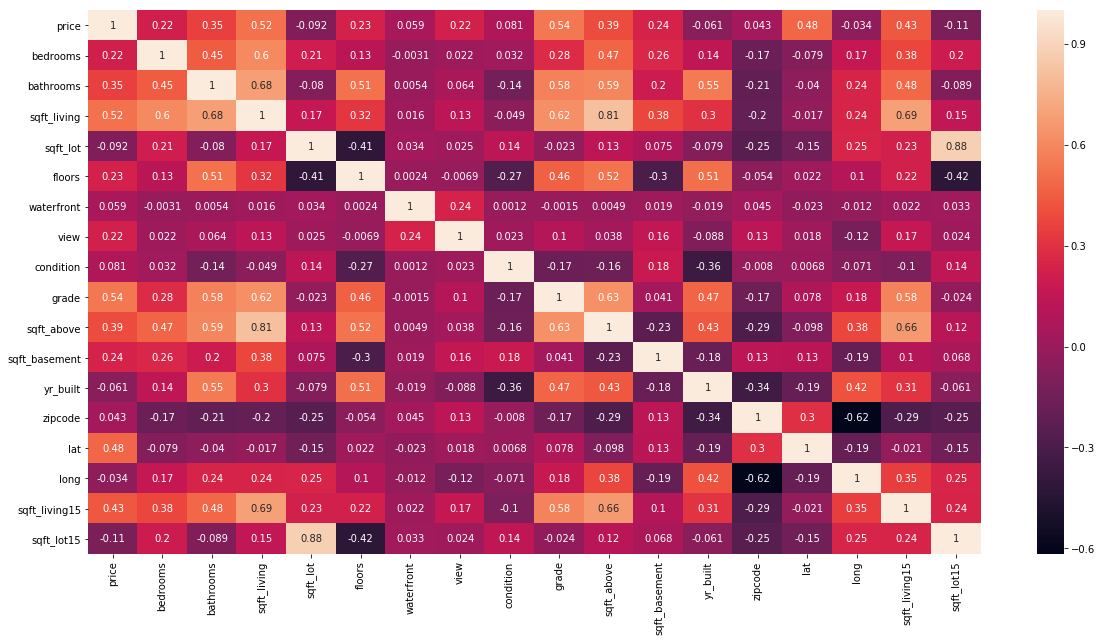

In [20]:
pyplot.subplots(figsize = (20,10))
sn.heatmap(data.corr(), annot=True)

* Correlation observed between sqft_lot and sqft_lot15 as 0.88 (Renovation has positive correlation on the lot area)
* Sqft_above and Sqft_living has a strong positive correlation

### Split the Train Test data

In [21]:
# Split-out train test dataset
X = data.drop('price', axis=1)
Y = data[['price']]
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

### Linear Regression model without Kfold

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.6703088272826581
0.6632585542097387


### Kfold validation on Linear Regression model

In [23]:
kfold = KFold(n_splits=10, random_state=seed)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(cv_results.mean())
print(cv_results)

0.668699575644859
[0.65605488 0.67846987 0.66579277 0.68451866 0.67737382 0.67940749
 0.62571421 0.65365058 0.67040963 0.69560383]


### Standardization of data 

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train.values)

In [25]:
cv_results = cross_val_score(model, scaled_data, Y_train, cv=kfold)
print(cv_results.mean())
print(cv_results)

0.6686995756448588
[0.65605488 0.67846987 0.66579277 0.68451866 0.67737382 0.67940749
 0.62571421 0.65365058 0.67040963 0.69560383]


* Standardization of data did not produce any significant improvement in the scores

### Feature selection to identify key features using forward selection method

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [27]:
# Build step forward feature selection
sfs1 = sfs(model, k_features=5, forward=True, scoring='r2', cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (8,),
  'cv_scores': array([0.29985248, 0.29933052, 0.28393223, 0.26624603, 0.29993793]),
  'avg_score': 0.28985983714011987,
  'feature_names': ('grade',),
  'ci_bound': 0.017088696201605164,
  'std_dev': 0.013295586204024282,
  'std_err': 0.006647793102012141},
 2: {'feature_idx': (8, 13),
  'cv_scores': array([0.49735513, 0.49980912, 0.49287432, 0.44017939, 0.49468848]),
  'avg_score': 0.4849812900574584,
  'feature_names': ('grade', 'lat'),
  'ci_bound': 0.028950255625551216,
  'std_dev': 0.02252428241201338,
  'std_err': 0.01126214120600669},
 3: {'feature_idx': (2, 8, 13),
  'cv_scores': array([0.57260294, 0.56785082, 0.56981543, 0.51449705, 0.56303708]),
  'avg_score': 0.5575606615526774,
  'feature_names': ('sqft_living', 'grade', 'lat'),
  'ci_bound': 0.027963881308082437,
  'std_dev': 0.021756849682645185,
  'std_err': 0.010878424841322593},
 4: {'feature_idx': (2, 8, 11, 13),
  'cv_scores': array([0.6219304 , 0.63341983, 0.63236557, 0.58692288, 0.63606018

In [28]:
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
subsetColumnList = [columnList[i] for i in feat_cols] 

In [29]:
model_subset = LinearRegression()
model_subset.fit(X_train[subsetColumnList], Y_train)
model_subset.score(X_test[subsetColumnList],Y_test)

0.6320780466085227

* With all 19 features the mean accuracy scores was 67%, with top 5 features the score was 63%.

### Polynomial Regression for any improvement in performance

In [30]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
model.fit(xPoly_train, Y_train)
model.score(xPoly_train, Y_train)

0.751920165007375

* Polynomial with degree 2 provides better accuracy of 75%

### Grid Search to identify the best paramaters for linear regression model

In [31]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters,scoring='r2', cv=10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [32]:
print("Best Hyper Parameters:",grid.best_params_)
print("Accuracy: ",grid.score(X_test, Y_test))

Best Hyper Parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Accuracy:  0.663204433921651


* Try other models like Decision Trees or Ensembles for performance improvement. 

In [34]:
# DT 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

params = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
#Make ML model with hyper parameters sets
grid_result = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Train the model
grid_result.fit(X_train, Y_train)
#The best hyper parameters set

print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))


Best: -0.780905 using {'min_samples_leaf': 11, 'min_samples_split': 8}
